<a href="https://colab.research.google.com/github/Ranjan4Kumar/CreditCard_Fraud_detection_PCA/blob/main/PCA_Analysis_on_credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [7]:
df = pd.read_csv('/content/drive/MyDrive/DS/PCA/creditcard.csv')

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [42]:
# set environment variables
%matplotlib inline
RANDOM_SEED = 27
LABELS = ['Normal' , 'Fraud']


In [40]:
# Time is Irrelevant data
df_1 = df.drop(['Time'] , axis = 1)
df_1.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
# Standarized the amount
df_1['Amount'] = StandardScaler().fit_transform(df_1['Amount'].values.reshape(-1,1))

In [43]:
#Train test split of the data set
X_train , X_test = train_test_split(df_1 , test_size = 0.2 , random_state = RANDOM_SEED)

In [45]:
# Train on normal class == 0
X_train = X_train[X_train.Class == 0]

# Class variable is not needed drop trhis class variable

X_train = X_train.drop(['Class'] , axis = 1)

# Test data
y_test = X_test['Class']
X_test = X_test.drop(['Class'] , axis = 1)

# Standarized the data based on mean and sd of X_train
mean = X_train.mean(axis = 0 )
sd = X_train.std(axis = 0)
X_train = (X_train - mean)/sd
X_test = (X_test - mean)/sd

# convert to numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [46]:
# Check Standarization of Data
print(np.mean(X_train , axis = 0))
print(np.std(X_train , axis = 0))
print(np.mean(X_test , axis = 0))
print(np.std(X_train , axis = 0))

[-1.60878544e-17  6.59133450e-18 -4.43587441e-18 -2.51470345e-18
 -2.24917576e-18 -6.18523333e-18 -6.71628871e-18 -5.46674663e-19
  1.46508810e-17 -1.52131749e-17  2.46159791e-17 -6.31018754e-18
 -7.65344528e-18 -9.68395117e-18 -1.84619843e-17  1.12458788e-18
  2.30852900e-17  1.05586306e-17 -7.99706935e-18  1.32763847e-18
  3.56119495e-18 -3.69864458e-17 -1.62440471e-18 -3.43936459e-17
  1.62440471e-17 -1.19643655e-17  1.24954209e-18 -2.24917576e-18
  1.34950545e-17]
[0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978]
[-9.64158338e-03  6.78752177e-03 -3.24662393e-03 -3.59966298e-03
  2.35552828e-03 -1.54444756e-03 -8.79391841e-03 -9.22211456e-04
 -7.35124705e-03 -1.33556197e-02  1.48988153e-02  9.97076818e-04
  3.49648368e-03 -9.50247775e-03  6.

In [47]:
# we will import linear algebra package
from numpy import linalg as LA
ndim = 2

In [48]:
# correlation matrix of x_train
A = np.matmul(np.transpose(X_train),X_train)

In [49]:
# get eigenvalues and eigenvectors: sort by largest eigenvalues
w, v = LA.eig(A)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

In [50]:
# Select two (ndim=2) largest eigenvalues and eigenvectors: vk
w2 = w[0:ndim]
v2 = v[:,0:ndim]

In [51]:
# eigenfilter for low dimensional approximation
VkVkT = np.matmul(v2,np.transpose(v2))
print(VkVkT.shape)

(29, 29)


In [52]:
# Dimensionality Reduction of x_test: yk = x*vk
y2 = np.matmul(X_test,v2)
print(y2.shape)

(56962, 2)


In [53]:
# reconstruct x_test
predictions_eig = np.matmul(X_test,VkVkT)

In [54]:
# MSE
mse_eig = np.mean(np.power(X_test - predictions_eig, 2), axis=1)
error_eig_df = pd.DataFrame({'reconstruction_error': mse_eig, 'true_class': y_test})
print("Full Sample",error_eig_df.describe())
error_eig_df_true = error_eig_df[(error_eig_df['true_class']== 0)]
print("Normal Sample",error_eig_df_true.describe())
error_eig_df_false = error_eig_df[(error_eig_df['true_class']== 1)]
print("Fraud Sample",error_eig_df_false.describe())


Full Sample        reconstruction_error    true_class
count          56962.000000  56962.000000
mean               0.934841      0.001826
std                3.358117      0.042690
min                0.118563      0.000000
25%                0.380663      0.000000
50%                0.580188      0.000000
75%                0.862327      0.000000
max              187.005713      1.000000
Normal Sample        reconstruction_error  true_class
count          56858.000000     56858.0
mean               0.890062         0.0
std                2.897428         0.0
min                0.118563         0.0
25%                0.380326         0.0
50%                0.579334         0.0
75%                0.860263         0.0
max              187.005713         0.0
Fraud Sample        reconstruction_error  true_class
count            104.000000       104.0
mean              25.416222         1.0
std               31.558449         0.0
min                0.298480         1.0
25%                4.48

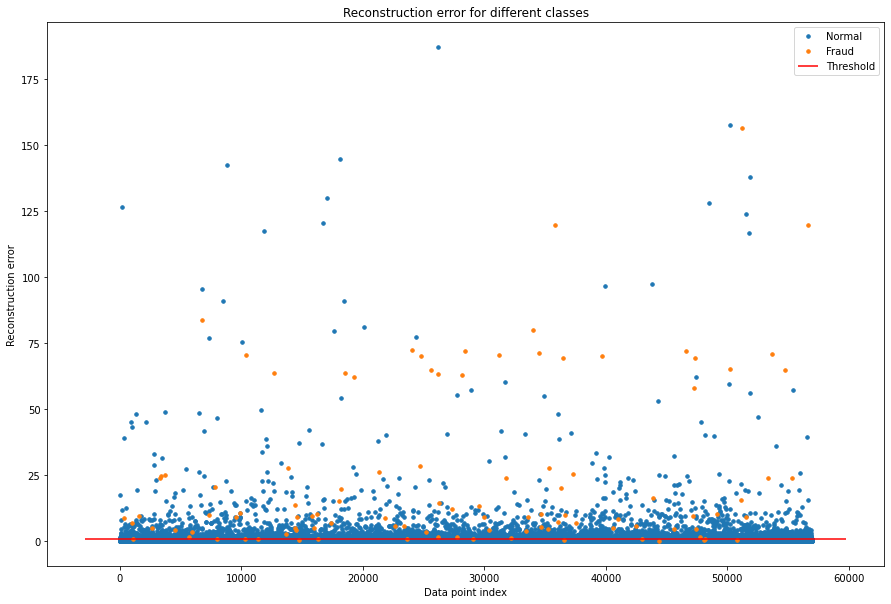

In [55]:

# scatter plot
threshold = 0.9
groups = error_eig_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(15, 10))
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

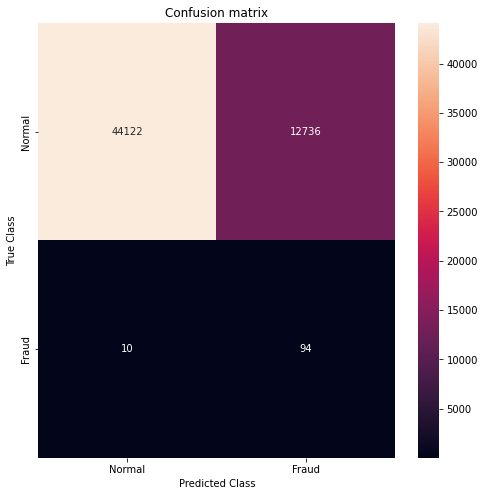

In [59]:
# confusion matrix
from sklearn.metrics import confusion_matrix
threshold = 0.9
# And see how well we're dividing the two types of transactions:
groups = error_eig_df.groupby('true_class')
# predict fraud
y_pred = [1 if e > threshold else 0 for e in error_eig_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_eig_df.true_class, y_pred)
# plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


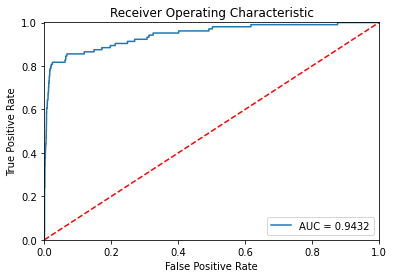

In [62]:
# ROC
from sklearn.metrics import roc_curve , auc
fpr, tpr, thresholds = roc_curve(error_eig_df.true_class, error_eig_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
# plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();
     
